## **Food Delivery Cost and Profitability Analysis**

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/food_orders_new_delhi.csv")

In [ ]:
print(df.head())

   Order ID Customer ID Restaurant ID  Order Date and Time  \
0         1       C8270         R2924  2024-02-01 01:11:52   
1         2       C1860         R2054  2024-02-02 22:11:04   
2         3       C6390         R2870  2024-01-31 05:54:35   
3         4       C6191         R2642  2024-01-16 22:52:49   
4         5       C6734         R2799  2024-01-29 01:19:30   

  Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
0    2024-02-01 02:39:52         1914             0       Credit Card   
1    2024-02-02 22:46:04          986            40    Digital Wallet   
2    2024-01-31 06:52:35          937            30  Cash on Delivery   
3    2024-01-16 23:38:49         1463            50  Cash on Delivery   
4    2024-01-29 02:48:30         1992            30  Cash on Delivery   

  Discounts and Offers  Commission Fee  Payment Processing Fee  \
0            5% on App             150                      47   
1                  10%             198                  

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB
None


In [ ]:
print(df.describe())

          Order ID  Order Value  Delivery Fee  Commission Fee  \
count  1000.000000  1000.000000   1000.000000      1000.00000   
mean    500.500000  1053.969000     28.620000       126.99000   
std     288.819436   530.975339     16.958278        43.06405   
min       1.000000   104.000000      0.000000        50.00000   
25%     250.750000   597.750000     20.000000        90.00000   
50%     500.500000  1038.500000     30.000000       127.00000   
75%     750.250000  1494.000000     40.000000       164.00000   
max    1000.000000  1995.000000     50.000000       200.00000   

       Payment Processing Fee  Refunds/Chargebacks  
count             1000.000000          1000.000000  
mean                29.832000            28.300000  
std                 11.627165            49.614228  
min                 10.000000             0.000000  
25%                 20.000000             0.000000  
50%                 30.000000             0.000000  
75%                 40.000000            50

Order Date and Time and Delivery Date and Time columns have been converted to datetime format.

In [ ]:
df['Delivery Date and Time'] = pd.to_datetime(df['Delivery Date and Time'], format='%d-%m-%Y %H:%M', dayfirst=True)
df['Order Date and Time'] = pd.to_datetime(df['Order Date and Time'], format='%d-%m-%Y %H:%M', dayfirst=True)

In [ ]:
def extract_discount(discount_str):
    if isinstance(discount_str, float):  # Check if it's already a float
        return discount_str
    elif 'off' in discount_str:
        return float(discount_str.split(' ')[0])
    elif '%' in discount_str:
        return float(discount_str.split('%')[0])
    else:
        return 0.0


In [ ]:
df['Discount Percentage'] = df['Discounts and Offers'].apply(lambda x: extract_discount(x))


In [ ]:
# for percentage discounts, calculate the discount amount based on the order value
df['Discount Amount'] = df.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] / 100)
                                                   if x['Discount Percentage'] > 1
                                                   else x['Discount Percentage'], axis=1)

In [ ]:
# Replace NaN values with 0 in the Discount Percentage column
df['Discount Percentage'] = df['Discount Percentage'].fillna(0)

# Replace NaN values with 0 in the Discount Amount column
df['Discount Amount'] = df['Discount Amount'].fillna(0)


In [ ]:
print(df[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']].head(), df.dtypes)

   Order Value Discounts and Offers  Discount Percentage  Discount Amount
0         1914            5% on App                  5.0            95.70
1          986                  10%                 10.0            98.60
2          937         15% New User                 15.0           140.55
3         1463                  NaN                  0.0             0.00
4         1992         50 off Promo                 50.0           996.00 Order ID                    int64
Customer ID                object
Restaurant ID              object
Order Date and Time        object
Delivery Date and Time     object
Order Value                 int64
Delivery Fee                int64
Payment Method             object
Discounts and Offers       object
Commission Fee              int64
Payment Processing Fee      int64
Refunds/Chargebacks         int64
Discount Percentage       float64
Discount Amount           float64
dtype: object


## **Cost and Profitability Analysis**

For the cost analysis, we’ll consider the following costs associated with each order:

**Delivery Fee**: The fee charged for delivering the order.

**Payment Processing Fee**: The fee for processing the payment.

**Discount Amount**: The discount provided on the order.

The revenue for the platform is mainly derived from the **Commission Fee.**

We’ll calculate the net profit by subtracting the total costs (including discounts) from the revenue generated through commission fees.

In [ ]:
# Convert relevant columns to numeric type before calculation
df['Delivery Fee'] = pd.to_numeric(df['Delivery Fee'], errors='coerce')
df['Payment Processing Fee'] = pd.to_numeric(df['Payment Processing Fee'], errors='coerce')
df['Discount Amount'] = pd.to_numeric(df['Discount Amount'], errors='coerce') # Removed extra space in the column name

# calculate total costs and revenue per order
df['Total Costs'] = df['Delivery Fee'] + df['Payment Processing Fee'] + df['Discount Amount'] # Removed extra space in the column name
df['Revenue'] = df['Commission Fee']
df['Profit'] = df['Revenue'] - df['Total Costs']

In [ ]:
# aggregate data to get overall metrics
total_orders = df.shape[0]
total_revenue = df['Revenue'].sum()
total_costs = df['Total Costs'].sum()
total_profit = df['Profit'].sum()

overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit
}

print(overall_metrics)

{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 232709.85, 'Total Profit': -105719.85}


To better understand the distribution of costs, revenue, and profit, let’s plot:

**A histogram** of profits per order to visualize the distribution of profitable and unprofitable orders.

**A pie chart** to visualize the proportion of total costs (delivery fees, payment processing fees, and discounts).

**A bar chart** to compare total revenue, total costs, and total profit

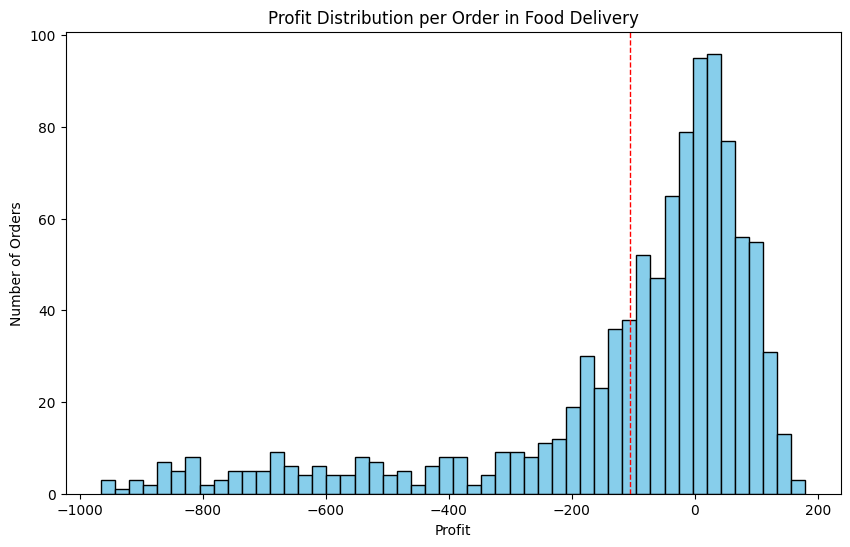

In [ ]:
# histogram of profits per order
plt.figure(figsize=(10, 6))
plt.hist(df['Profit'], bins=50, color='skyblue', edgecolor='black')
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(df['Profit'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

The histogram shows a wide distribution of profit per order, with a noticeable number of orders resulting in a loss **(profits below 0)**. The red dashed line indicates the average profit, which is in the negative territory, highlighting the overall loss-making situation.

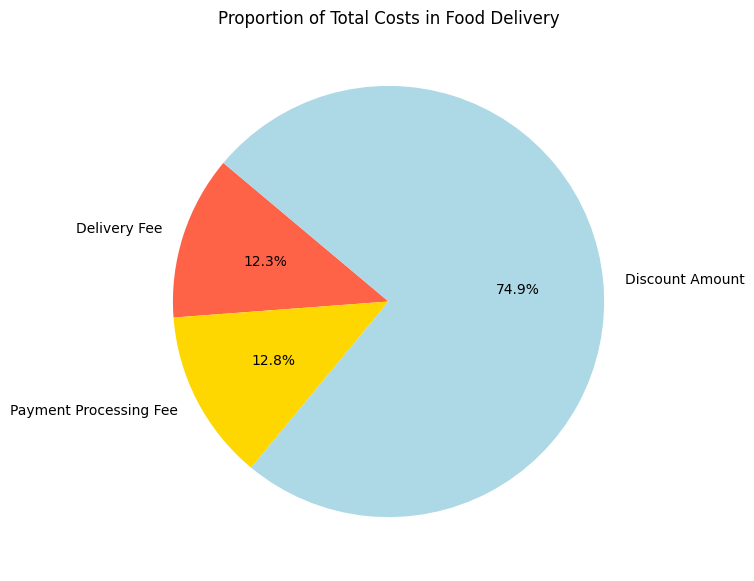

In [ ]:
# pie chart for the proportion of total costs
costs_breakdown = df[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(7, 7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'lightblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

The pie chart illustrates the breakdown of total costs into delivery fees, payment processing fees, and discount amounts. Discounts constitute a significant portion of the costs, suggesting that **promotional strategies might be heavily impacting overall profitability**.

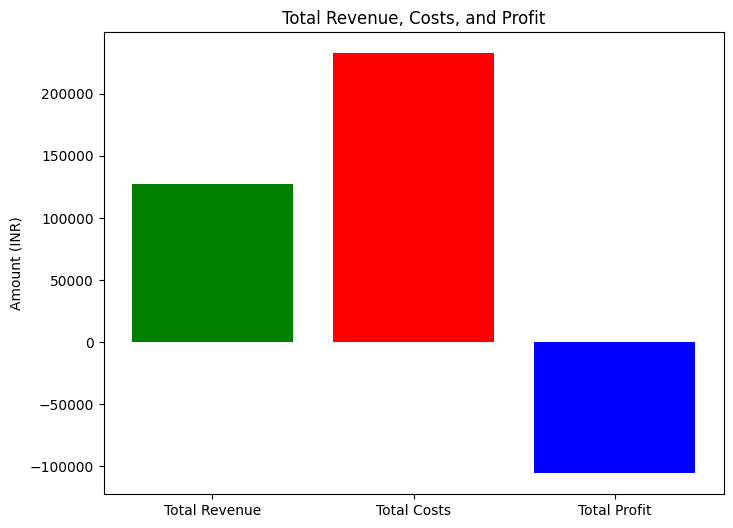

In [ ]:
# bar chart for total revenue, costs, and profit
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize=(8, 6))
plt.bar(totals, values, color=['green', 'red', 'blue'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (INR)')
plt.show()

The bar chart compares total revenue, total costs, and total profit. It visually represents the gap between revenue and costs, clearly showing that the costs surpass the revenue, leading to a **total loss**.

## **A New Strategy for Profits**

From the analysis so far we understood that the discounts on food orders are resulting in huge losses. Now, we need to find a new strategy for profitability. We need to find a sweet spot for offering discounts and charging commissions. To find a sweet spot for commission and discount percentages, we can analyze the characteristics of profitable orders more deeply. Specifically, we need to look for:

  1.A new average commission percentage based on profitable orders.

  2.A new average discount percentage for profitable orders, that could serve as a guideline for what level of
  discount still allows for profitability.

Given these new averages, we can suggest adjustments that might not only make individual orders profitable but also apply broadly across all orders to improve overall profitability.



In [ ]:
# filter the dataset for profitable orders
profitable_orders = df[df['Profit'] > 0]

# Convert 'Commission Fee' and 'Order Value' to numeric, handling potential errors
profitable_orders['Commission Fee'] = pd.to_numeric(profitable_orders['Commission Fee'], errors='coerce')
profitable_orders['Order Value'] = pd.to_numeric(profitable_orders['Order Value'], errors='coerce')

# calculate the average commission percentage for profitable orders
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100

# calculate the average discount percentage for profitable orders
profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100

# calculate the new averages
new_avg_commission_percentage = profitable_orders['Commission Percentage'].mean()
new_avg_discount_percentage = profitable_orders['Effective Discount Percentage'].mean()

print(new_avg_commission_percentage, new_avg_discount_percentage)

30.508436145149435 5.867469879518072


<ipython-input-69-88e36f935dd8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Commission Fee'] = pd.to_numeric(profitable_orders['Commission Fee'], errors='coerce')
<ipython-input-69-88e36f935dd8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Order Value'] = pd.to_numeric(profitable_orders['Order Value'], errors='coerce')
<ipython-input-69-88e36f935dd8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

Based on the analysis of profitable orders, we find a new set of averages that could represent a “sweet spot” for commission and discount percentages:

New Average Commission Percentage: 30.5%

New Average Discount Percentage: 6%

Based on this analysis, a strategy that aims for a **commission rate closer to 30.5%** and a **discount rate around 6%** could potentially improve profitability across the board.

In [ ]:
# simulate profitability with recommended discounts and commissions
recommended_commission_percentage = 39.0  # 30.5%
recommended_discount_percentage = 6.0    # 6%

# Convert 'Order Value' to numeric
df['Order Value'] = pd.to_numeric(df['Order Value'], errors='coerce')

###   Step 1: Calculate the Simulated Commission Fee and Discount Amount  ####

df['Simulated Commission Fee'] = df['Order Value'] * (recommended_commission_percentage / 100)
df['Simulated Discount Amount'] = df['Order Value'] * (recommended_discount_percentage / 100)

## Simulated Commission Fee: For each order, this is calculated as Order Value × 0.30
## Simulated Discount Amount: For each order, this is calculated as Order Value × 0.06

####  Step 2: Recalculate Total Costs with Simulated Values  ####

df['Simulated Total Costs'] = (df['Delivery Fee'] +
                                        df['Payment Processing Fee'] +
                                        df['Simulated Discount Amount'])
#Simulated Total Costs: For each order, this is calculated as
#Delivery Fee+Payment Processing Fee+Simulated Discount Amount

####  Step 3: Recalculate Profit with Simulated Values ###

df['Simulated Profit'] = (df['Simulated Commission Fee'] -
                                   df['Simulated Total Costs'])
#Simulated Profit: For each order, this is calculated as Simulated Commission Fee−Simulated Total Costs

This comparison will help illustrate the potential impact of adopting the recommended discount and commission rates on the overall profitability of orders.

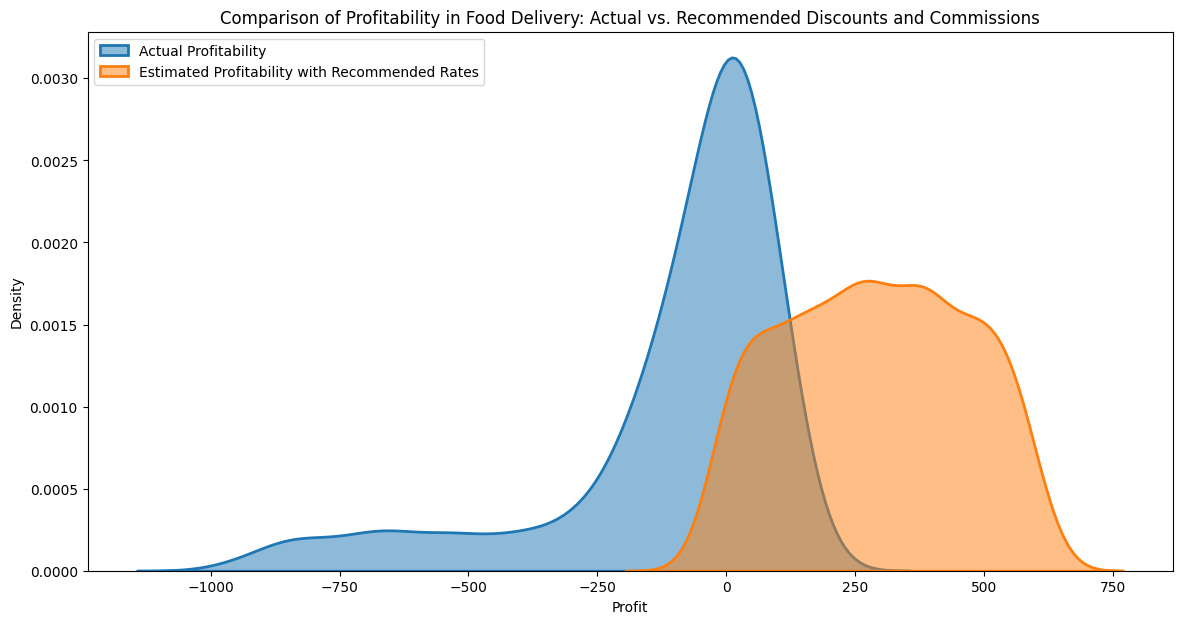

In [ ]:
# visualizing the comparison
import seaborn as sns

plt.figure(figsize=(14, 7))

# actual profitability
sns.kdeplot(df['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# simulated profitability
sns.kdeplot(df['Simulated Profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

The visualization compares the distribution of profitability per order using actual discounts and commissions versus the simulated scenario with recommended discounts (6%) and commissions (30%).

The actual profitability distribution shows a mix, with a significant portion of orders resulting in losses (profit < 0) and a broad spread of profit levels for orders. The simulated scenario suggests a shift towards higher profitability per order. The distribution is more skewed towards positive profit, indicating that the recommended adjustments could lead to a higher proportion of profitable orders.

